<a href="https://colab.research.google.com/github/DamodaraBarbosa/xbox_game_pass_analisys/blob/main/Statistical_Analisys_Xbox_Game_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from numpy import NaN

Parâmetros do matplotlib

In [2]:
plt.rcParams['figure.figsize'] = (18, 12)
parametros = {'axes.labelsize': 25, 'axes.titlesize': 30}
plt.rcParams.update(parametros)

Importando o dataframe

In [3]:
gamepass = pd.read_csv('/content/data_gamepass.csv')
gamepass.head()

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,Role-Playing,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,NaN,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,First-Person Shooter,NaN,NaN,M,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaN,2022-11-01,NaN,Action,Fatshark,Fatshark,RP,...,['Optimized for Xbox Series X/S'],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          1197 non-null   object 
 1   system        1196 non-null   object 
 2   status        1196 non-null   object 
 3   release_date  753 non-null    object 
 4   added         1197 non-null   object 
 5   removed       646 non-null    object 
 6   genre         1192 non-null   object 
 7   developer     733 non-null    object 
 8   publisher     733 non-null    object 
 9   esrb          678 non-null    object 
 10  esrb content  594 non-null    object 
 11  addons        733 non-null    object 
 12  ta_score      906 non-null    float64
 13  gamerscore    906 non-null    float64
 14  ratio         905 non-null    float64
 15  gamers        926 non-null    float64
 16  comp_%        926 non-null    float64
 17  comp_time     846 non-null    float64
 18  rating        864 non-null  

In [5]:
gamepass.at[412, 'developer'] = ['Rare', 'Dlala Studios']

In [6]:
gamepass.at[429, 'developer'] = ['The Coalition', 'Splash Damage']

# Análise estatística dos dados

## Das variáveis qualitativas

### Frequência das developers

Tratamentos da variável developer

In [7]:
for index, developers in enumerate(gamepass['developer']):
  try:
    if '343' in developers:
      print(f'{index}: {developers}')
  except TypeError:
    pass

# os dados dos index 499, 522 e 539 foram inseridos com fragia errada

194: 343 Industries
330: 343 Industries
499: 343 IndustriesBungie
522: Behaviour Interactive343i
538: 343 Industries
539: 343 IndustriesVanguard Games


In [8]:
# os dados são corrigidos manualmente:

gamepass.at[499, 'developer'] = ['343 Industries', 'Bungie']
gamepass.at[522, 'developer'] = ['343 Industries', 'Behaviour Interactive']
gamepass.at[539, 'developer'] = ['343 Industries', 'Vanguard Games']

In [9]:
# tratamento para uso do método split()

gamepass['developer'].replace(' , ', ', ', inplace= True)
gamepass['developer'] = gamepass['developer'].str.replace(' / ', '/')

In [10]:
# itera-se da coluna developer e se separam os dados que são separados por ', ' ou '/'

for index, developers in enumerate(gamepass['developer']):
  try:
    if ',' in developers and 'Inc.' not in developers and 'JW' not in developers:
      developers = developers.split(', ')
      gamepass.at[index, 'developer'] = developers
    if '/' in developers:
      developers = developers.split('/')
      gamepass.at[index, 'developer'] = developers
  except:
    pass

In [11]:
# como há jogos que não são desenvolvidos por apenas uma desenvolvedora, mas em colaboração, é preferível não usar
# o método value_counts(), mas iterar os valores da coluna para acessar os elementos das listas, quando forem listas.

In [12]:
# a função garante a obtenção da frequência de cada developer, gênero de jogo ou publisher:

def freq_column(column):
  datas_dict = dict()

  for datas in gamepass[column]:
    if type(datas) == list:
      for data in datas:
        if data not in datas_dict.keys():
          datas_dict[data] = 1
        else:
          datas_dict[data] = datas_dict[data] + 1
    else:
      if datas not in datas_dict.keys():
        datas_dict[datas] = 1
      else:
        datas_dict[datas] += 1
    
  return datas_dict

In [13]:
developers_dict = freq_column('developer')

In [14]:
developers_dict.pop(NaN)

469

In [15]:
# para ordenar o dicionário:

developers_sorted = {k: v for k, v in sorted(developers_dict.items(), key=lambda item: item[1], reverse= True)}

In [16]:
# convertendo as keys e os values para o tipo lista a fim de acessá-los pelo index:

developers_sorted_keys = list(developers_sorted)
developers_sorted_values = list(developers_sorted.values())

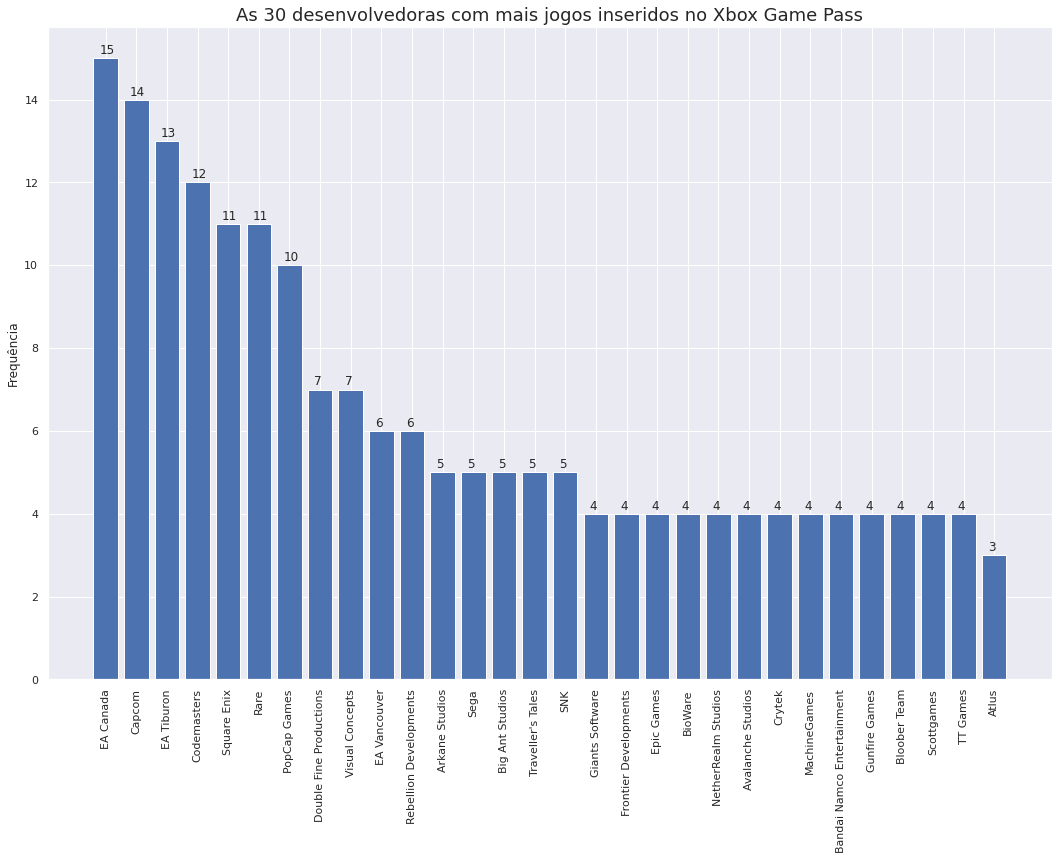

In [17]:
# definindo gráfico com as frequências de cada developer:

sns.set()
bars = plt.bar(developers_sorted_keys[:30], developers_sorted_values[:30])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 30 desenvolvedoras com mais jogos inseridos no Xbox Game Pass', fontsize= 18)
plt.ylabel('Frequência')
plt.xticks(rotation= '90')
plt.show()

## Frequências dos gêneros dos jogos

In [18]:
# alguns tratamentos nos dados da coluna genre,
# particiona-se os dados usando o método split():

gamepass['genre'] = gamepass['genre'].str.replace(' / ', '/')

In [19]:
# para separar os dados dos gêneros dos jogos:

gamepass['genre'] = gamepass['genre'].str.split('/')

In [20]:
# utiliza-se a função freq_column() para obtenção da frequência de cada gênero dos jogos:

genre_dict = freq_column('genre')

In [21]:
# elimina-se as ocorrências em que os jogos não apresentaram gênero:

genre_dict.pop(NaN)

5

In [22]:
# para ordenar o dicionário:

genre_sorted = {k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1])}

In [23]:
# converte-se as keys e values para o tipo lista a fim de acessá-los pelo index:

genre_sorted_keys = list(genre_sorted.keys())
genre_sorted_values = list(genre_sorted.values())

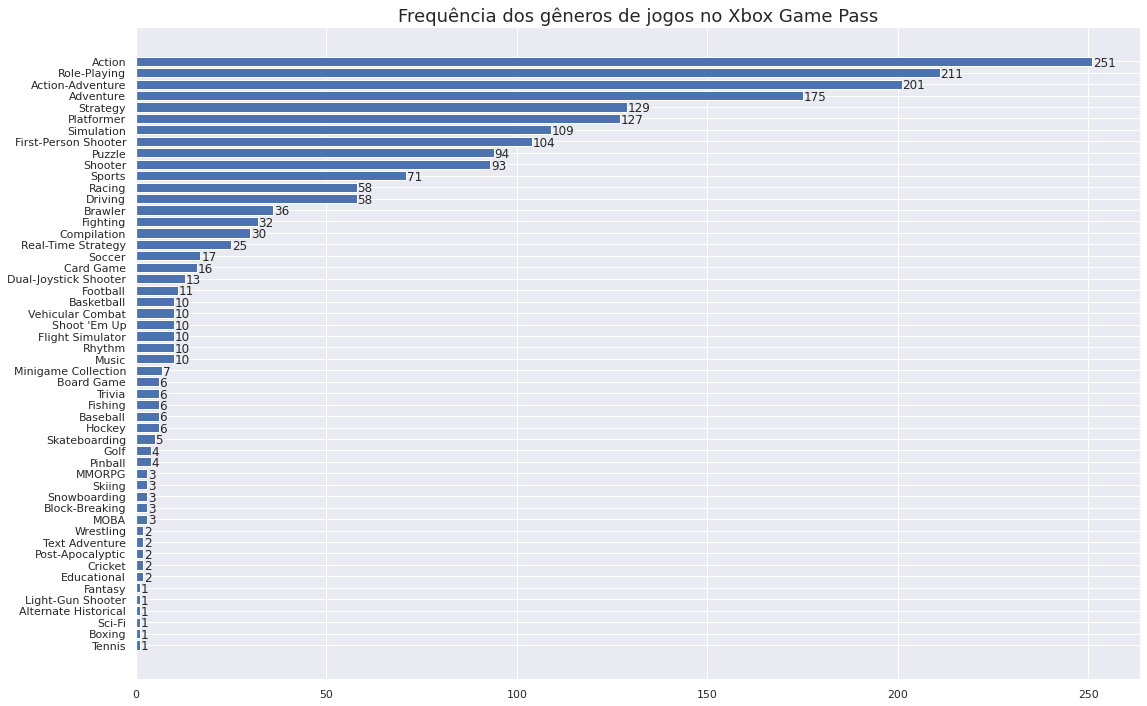

In [24]:
bars = plt.barh(y= genre_sorted_keys, width= genre_sorted_values)

for index, bar in enumerate(bars):
  value = bar.get_width()
  plt.text(value + 0.2, index - 0.4, value)

plt.title('Frequência dos gêneros de jogos no Xbox Game Pass', fontsize= 18)
plt.savefig('Gênero dos jogos no Xbox Game Pass.png', format= 'png')
plt.show()

## Frequência das publishers

In [25]:
# alguns tratamentos para determinar a frequência das publishers:

for index, publishers in enumerate(gamepass['publisher']):
  try:
    if ',' in publishers:
      publishers = publishers.split(', ')
      gamepass.at[index, 'publisher'] = publishers
  except TypeError:
    pass

In [26]:
# as frequências são colocadas em um dicionário:

publishers_dict = freq_column('publisher')

In [27]:
# elimina-se a frequência referente aos jogos que não apresentam publisher:

publishers_dict.pop(NaN)

464

In [28]:
# o dicionário é organizado:

publishers_sorted = {k: v for k, v in sorted(publishers_dict.items(), key=lambda item: item[1], reverse= True)}

In [29]:
# as keys e os valores dos dicionários são convertidos para o tipo lista:

publishers_sorted_keys = list(publishers_sorted.keys())
publishers_sorted_values = list(publishers_sorted.values())

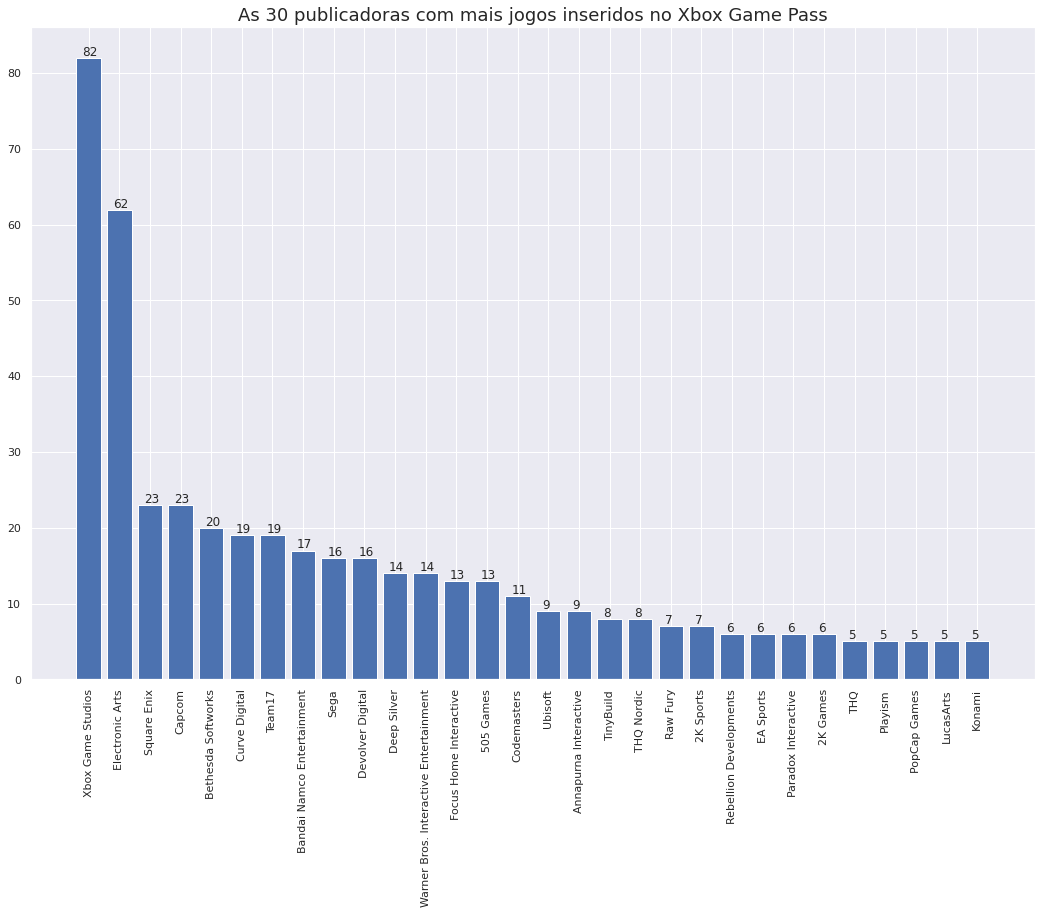

In [30]:
bars = plt.bar(publishers_sorted_keys[:30], publishers_sorted_values[:30])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.3, value)

plt.title('As 30 publicadoras com mais jogos inseridos no Xbox Game Pass', fontsize= 18)
plt.xticks(rotation= '90')
plt.show()

## Das variáveis quantitativas

### Gamers

Para todos os jogos inseridos no serviço

In [31]:
gamepass['gamers'].describe()

count       926.000000
mean      63551.585313
std       75008.761454
min           0.000000
25%       14644.250000
50%       36881.500000
75%       84985.000000
max      468837.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


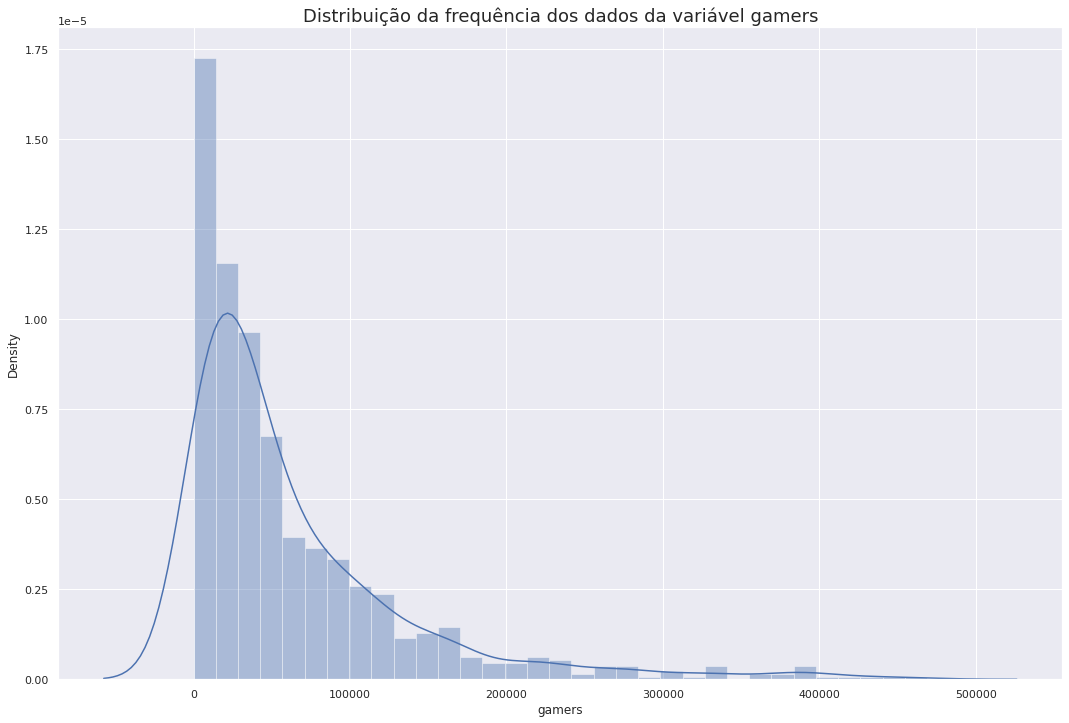

In [32]:
# a distribuição de frequências da coluna 'gamers':

ax = sns.distplot(gamepass['gamers'])
ax.set_title('Distribuição da frequência dos dados da variável gamers', fontsize= 18)
plt.show()

In [33]:
# média, mediana e moda da coluna gamers:

gamers = gamepass['gamers']
pd.DataFrame({'Moda': gamers.mode(), 'Média': gamers.mean(), 'Mediana': gamers.median()})

,Moda,Média,Mediana
0,0.0,63551.585313,36881.5


In [34]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers.mad(), 'Variância': gamers.var(), 'Desvio padrão': gamers.std()}, index= [0])

,Desvio médio,Variância,Desvio padrão
0,52414.640713,5.626314e+09,75008.761454


In [35]:
# percentis, decentis, quartis:

# percentis

percentis = pd.DataFrame(gamepass['gamers'].quantile([p/100 for p in range(1, 100)]))
percentis.index = percentis.index * 100
percentis

,gamers
1.0,0.00
2.0,0.00
3.0,296.25
4.0,1367.00
5.0,2111.25
...,...
95.0,218959.00
96.0,238474.00
97.0,274342.75
98.0,322075.50


In [36]:
# decentis

decentis = pd.DataFrame(gamers.quantile([d/10 for d in range(1, 10)]))
decentis.index = decentis.index * 100
decentis

,gamers
10.0,5393.0
20.0,12124.0
30.0,19572.0
40.0,27375.0
50.0,36881.5
60.0,49292.0
70.0,71285.0
80.0,99939.0
90.0,153720.5


In [37]:
# quartis

quartis = pd.DataFrame(gamers.quantile([0.25, 0.5, 0.75]))
quartis.index = quartis.index * 100
quartis

,gamers
25.0,14644.25
50.0,36881.50
75.0,84985.00


In [84]:
# plotando um boxplot:

fig = px.box(gamepass['gamers'], orientation= 'h', title= 'Boxplot da variável gamers inseridos no Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos ativos no serviço

In [39]:
# instancia-se variável apenas com os jogadores em jogos ativos no serviço:

gamers_active = gamepass.query('status == "Active"')['gamers']

In [40]:
# estatísticas descritivas da variável:

gamers_active.describe()

count       392.000000
mean      82586.073980
std       92750.114665
min           0.000000
25%       18309.500000
50%       48982.500000
75%      112424.000000
max      468837.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



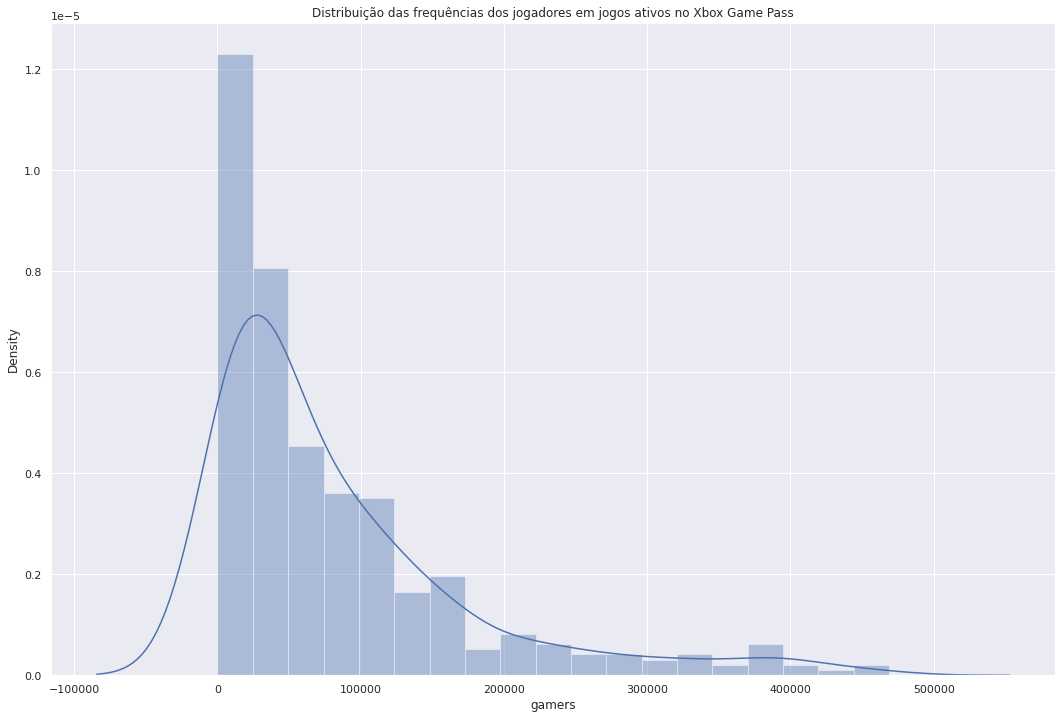

In [41]:
# distribuição das frequências para essa variável:

ax = sns.distplot(gamers_active)
ax.set_title('Distribuição das frequências dos jogadores em jogos ativos no Xbox Game Pass')
ax

In [42]:
# média, mediana e moda para variável:

pd.DataFrame({'Moda': gamers_active.mode(), 'Média': gamers_active.mean(), 'Mediana': gamers_active.median()})

,Moda,Média,Mediana
0,0.0,82586.07398,48982.5


In [43]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers_active.mad(), 'Variância': gamers_active.var(), 'Desvio padrão': gamers_active.std()}, index= [0])

,Desvio médio,Variância,Desvio padrão
0,67684.942433,8.602584e+09,92750.114665


In [44]:
# percentis:

pd.DataFrame(gamers_active.quantile([p/100 for p in range (1, 100)]))

,gamers
0.01,0.00
0.02,0.00
0.03,169.06
0.04,1836.52
0.05,2393.30
...,...
0.95,296475.15
0.96,329540.92
0.97,362860.17
0.98,390667.42


In [45]:
# decentis:

pd.DataFrame(gamers_active.quantile([p/10 for p in range(1, 10)]))

,gamers
0.1,6195.4
0.2,13869.8
0.3,24422.4
0.4,35161.0
0.5,48982.5
0.6,69937.8
0.7,96271.5
0.8,127244.4
0.9,207621.2


In [53]:
# quartis:

gamers_active.describe()[['25%', '50%', '75%']]

25%     18309.5
50%     48982.5
75%    112424.0
Name: gamers, dtype: float64

In [85]:
# plotando gráfico boxplot:

fig = px.box(gamers_active, orientation= 'h', title= 'Boxplot da variável gamers em jogos ativos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

Para os jogos removidos do serviço

In [55]:
# estatísticas descritivas:

gamers_removed = gamepass.query('status == "Removed"')['gamers']
gamers_removed.describe()

count       524.000000
mean      50225.935115
std       54626.174418
min           0.000000
25%       13941.000000
50%       32854.500000
75%       66255.750000
max      387583.000000
Name: gamers, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



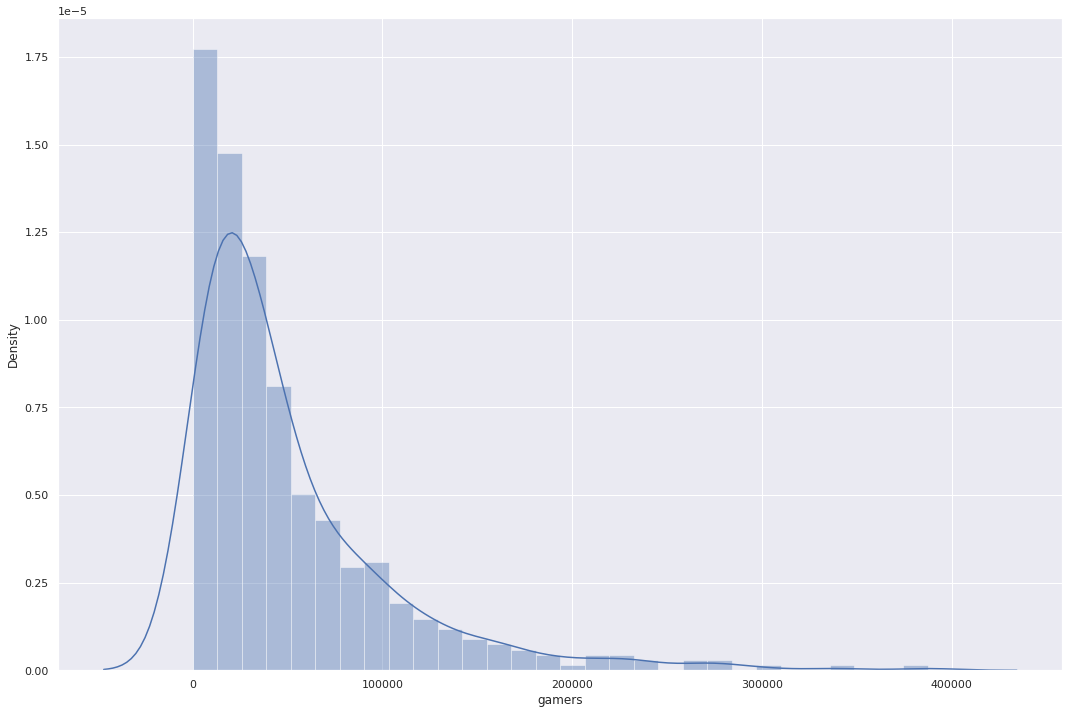

In [63]:
# distribuição de frequência para variável:

ax = sns.distplot(gamers_removed)


In [66]:
# média, mediana e moda:

pd.DataFrame({'Moda': gamers_removed.mode(), 'Média': gamers_removed.mean(), 'Mediana': gamers_removed.median()})

,Moda,Média,Mediana
0,44670.0,50225.935115,32854.5


In [68]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': gamers_removed.mad(),
              'Variância': gamers_removed.var(),
              'Desvio padrão': gamers_removed.std()},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,38420.611547,2.984019e+09,54626.174418


In [83]:
# plotando gráfico boxplot:

fig = px.box(gamers_removed, orientation= 'h', title= 'Boxplot da variável gamers em jogos removidos do Xbox Game Pass')
fig.update_layout(title= {'x': 0.5})

### Metascore

Para todos os jogos inseridos no serviço

In [46]:
# estatísticas descritivas da coluna metascore:

metascore = gamepass['metascore']
metascore.describe()

count    745.000000
mean      76.774497
std        8.634305
min       35.000000
25%       72.000000
50%       78.000000
75%       82.000000
max       96.000000
Name: metascore, dtype: float64

In [98]:
# frequência das notas:

freq_metascore = metascore.value_counts()
df_metascore = pd.DataFrame(freq_metascore)
df_metascore

,metascore
81.0,43
82.0,41
79.0,41
78.0,40
77.0,40
80.0,40
84.0,34
75.0,34
74.0,32
76.0,32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribuição de frequência da variável notas nos jogos inseridos no Xbox Game Pass')

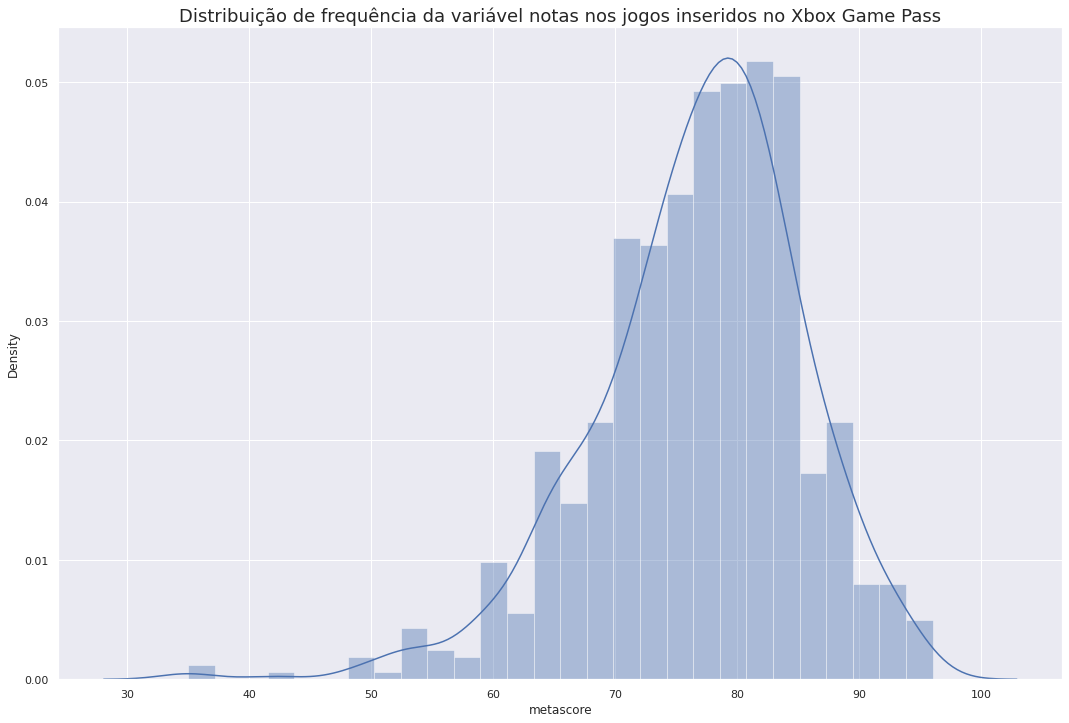

In [91]:
# distribuição das frequência das notas:

ax = sns.distplot(metascore)
ax.set_title('Distribuição de frequência da variável notas nos jogos inseridos no Xbox Game Pass', fontsize= 18)

In [125]:
# média, mediana e moda:

pd.DataFrame({'Moda': metascore.mode(), 'Média': metascore.mean().round(2), 'Mediana': metascore.median()})

,Moda,Média,Mediana
0,81.0,76.77,78.0


In [126]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio médio': metascore.mad(), 
              'Variância': metascore.var(), 
              'Desvio padrão': metascore.std()},
              index= [0])

,Desvio médio,Variância,Desvio padrão
0,6.611043,74.55123,8.634305


In [123]:
bins = [0, 50.0, 75.0, 100.0]
labels = ['Vermelha', 'Amarela', 'Verde']

colors_metascore = round(pd.cut(metascore, bins= bins, labels= labels, right= False).value_counts(normalize= True) * 100, 2)
colors_metascore

Verde       65.77
Amarela     33.56
Vermelha     0.67
Name: metascore, dtype: float64